In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here we have to predict the loan amount approved or not hence it is an binary classification problem so he have to build model on Classification problem

In [101]:
df.shape

(614, 13)

This dataset have 614 rows and 13 columns including the target variable

In [102]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Checked the columns

In [103]:
df.columns.tolist()  #  convert into the list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [104]:
df.dtypes  #checking the datatypes of the columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here 8 columns having object datatype and 3 columns having float datatype and 1 column is with int datatype

In [105]:
# checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we found null  values in Gender column, married,Dependents,Self_employed,LoanAmount,Loan_Amount_Term,Credit_History

In [106]:
# checking the sum of null values
df.isnull().sum().sum()

149

Total 149 null values present into the dataset

In [107]:
df.duplicated().sum()

0

Dataset dont have any duplicate values

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we have found null values and also checked the datatypes of all columns by using info method

In [109]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

Here we have checked the unique value counts of each columns lets treat the null values 

In [110]:
df['Gender'].ffill(inplace=True)   # filled null values of gender using ffill

In [111]:
df['Married'].ffill(inplace=True)  #filled null values of Married using ffill

In [112]:
df['Self_Employed'].ffill(inplace=True) #filled null values of Self_Employed using ffill

In [113]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)  #filled null values using mean method

In [114]:
df['Loan_Amount_Term'].ffill(inplace=True) #filled null values of Loan_Amount_Term using ffill

In [115]:
df['Credit_History'].ffill(inplace=True) #filled null values of Credit_history using ffill

In [116]:
df['Dependents'].ffill(inplace=True)    #filled null values of Dependents using ffill

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we have treated all the null values

In [119]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here we have zero null values

In [120]:
df.isnull().sum().sum()

0

<AxesSubplot:>

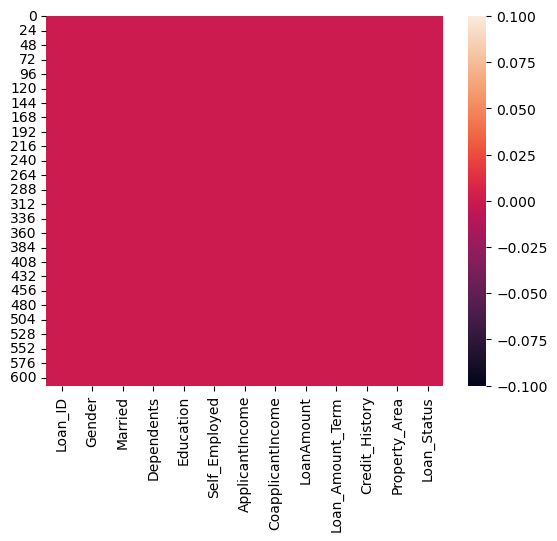

In [121]:
#lets visualize null values using heatmap

sns.heatmap(df.isnull())

By using heatmap we found no nul values into the dataset

In [122]:
# separating Numerical and categorical columns

#checking for categorical columns

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('Categorical columns    :',categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('Numerical columns    :',numerical_col)    

Categorical columns    : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical columns    : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [123]:
# checking the unique values of each columns using dataframe

df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,10


In [125]:
# Here we are dropping LoanID as it is not contributing towards the target variable

df.drop('Loan_ID',inplace=True,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [126]:
df.shape

(614, 12)

Y    422
N    192
Name: Loan_Status, dtype: int64


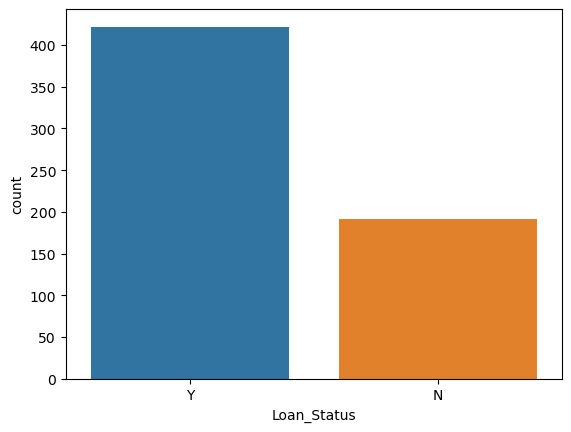

In [127]:
#univariate used to analyze the single column

ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

Here the count of loan status having muuch difference between yes and no

Yes    400
No     214
Name: Married, dtype: int64


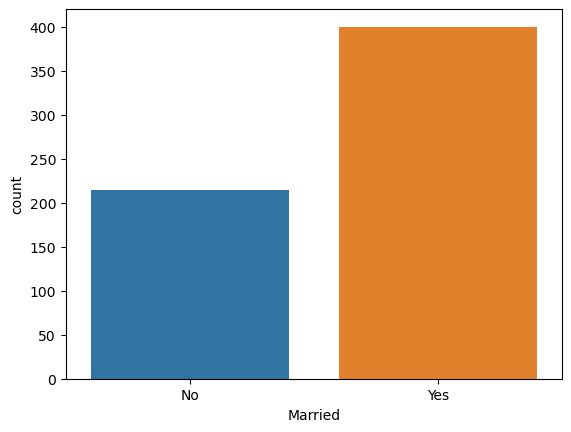

In [128]:
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

Here the count of Married having muuch difference between yes and no

0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64


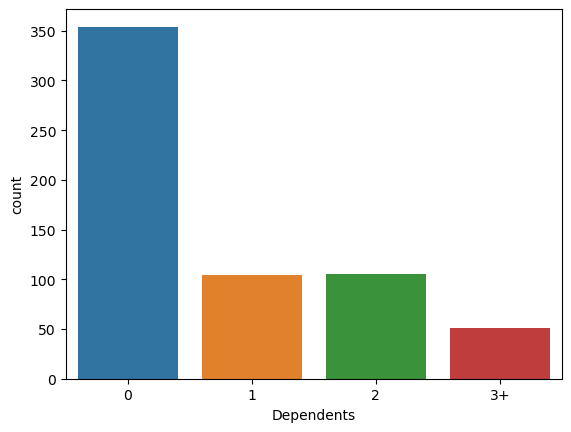

In [129]:
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

Here we checked the count of dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


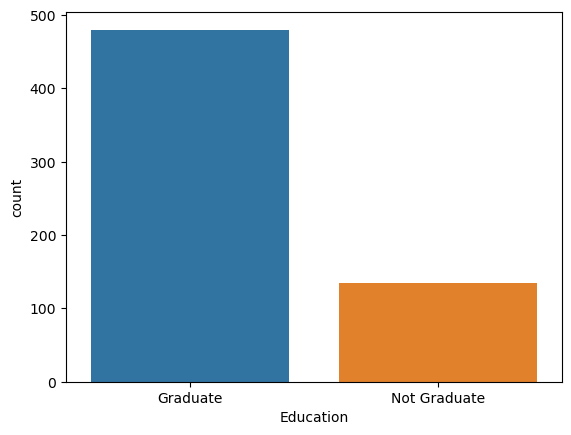

In [130]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

Here the count of no graduate and graduate having much difference

No     528
Yes     86
Name: Self_Employed, dtype: int64


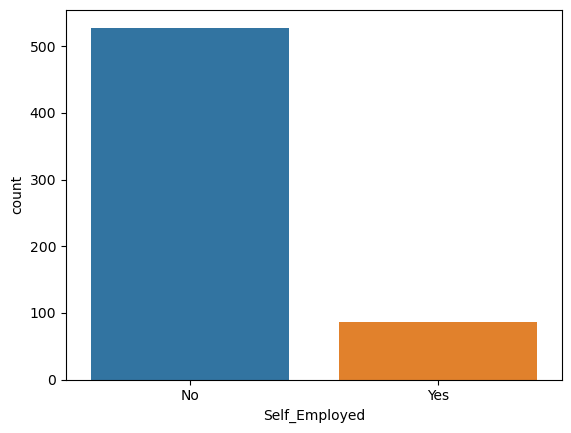

In [131]:
ax=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

Hre the count of self employed having much difference between yes and no

360.0    521
180.0     47
480.0     16
300.0     14
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


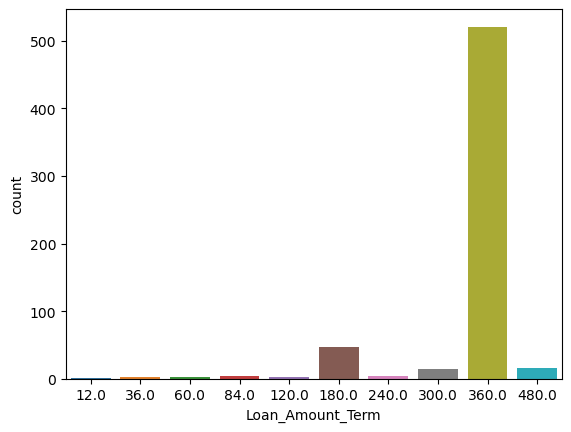

In [132]:
ax=sns.countplot(x='Loan_Amount_Term',data=df)
print(df['Loan_Amount_Term'].value_counts())

Here 360 count is so high

1.0    513
0.0    101
Name: Credit_History, dtype: int64


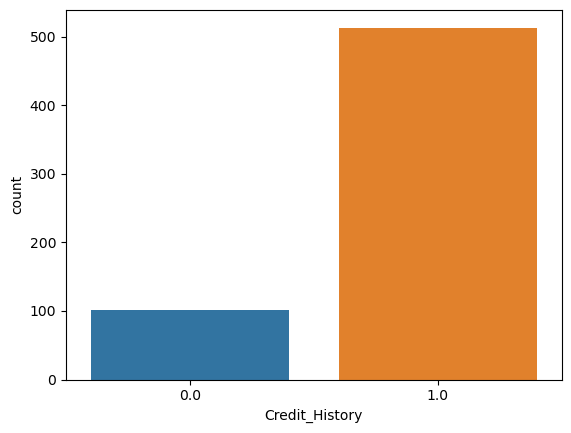

In [133]:
ax=sns.countplot(x='Credit_History',data=df)
print(df['Credit_History'].value_counts())

The count of 1 is much higher than 0

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


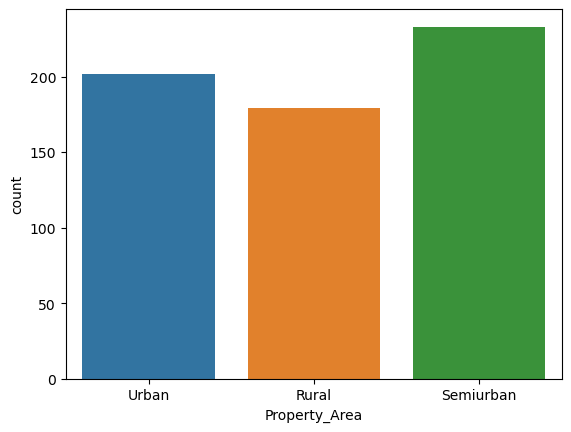

In [134]:
ax=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

Here we checked the count of property area

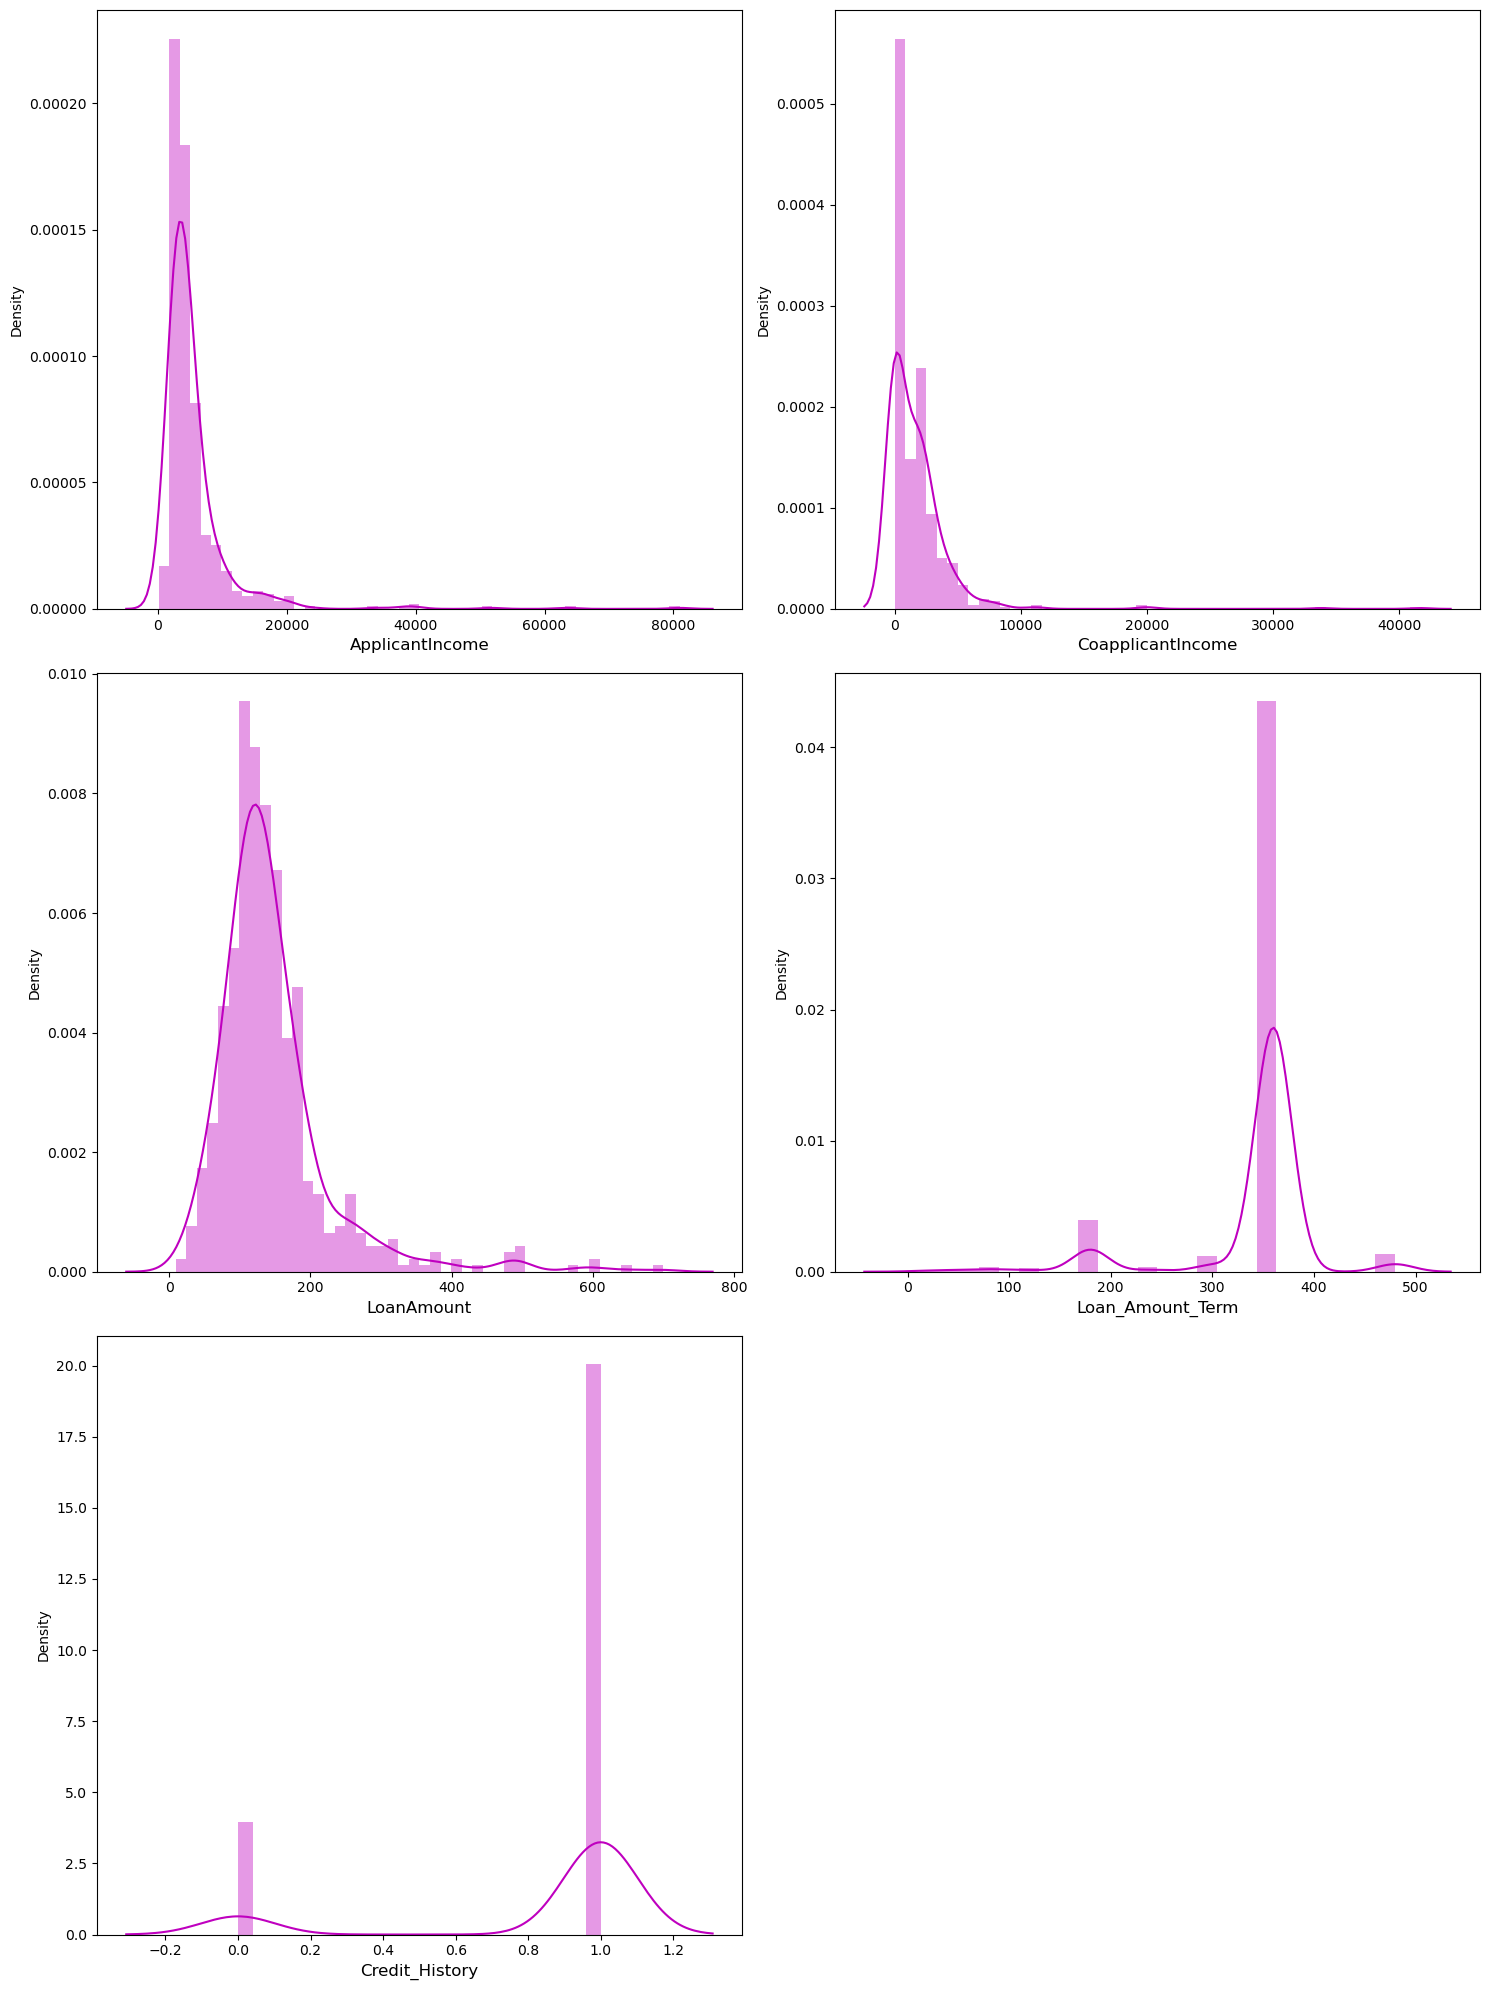

In [138]:
# lets check how data distributed of the numerical columns

plt.figure(figsize=(15,20), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()

Here except credit history all the columns have skewness into the column

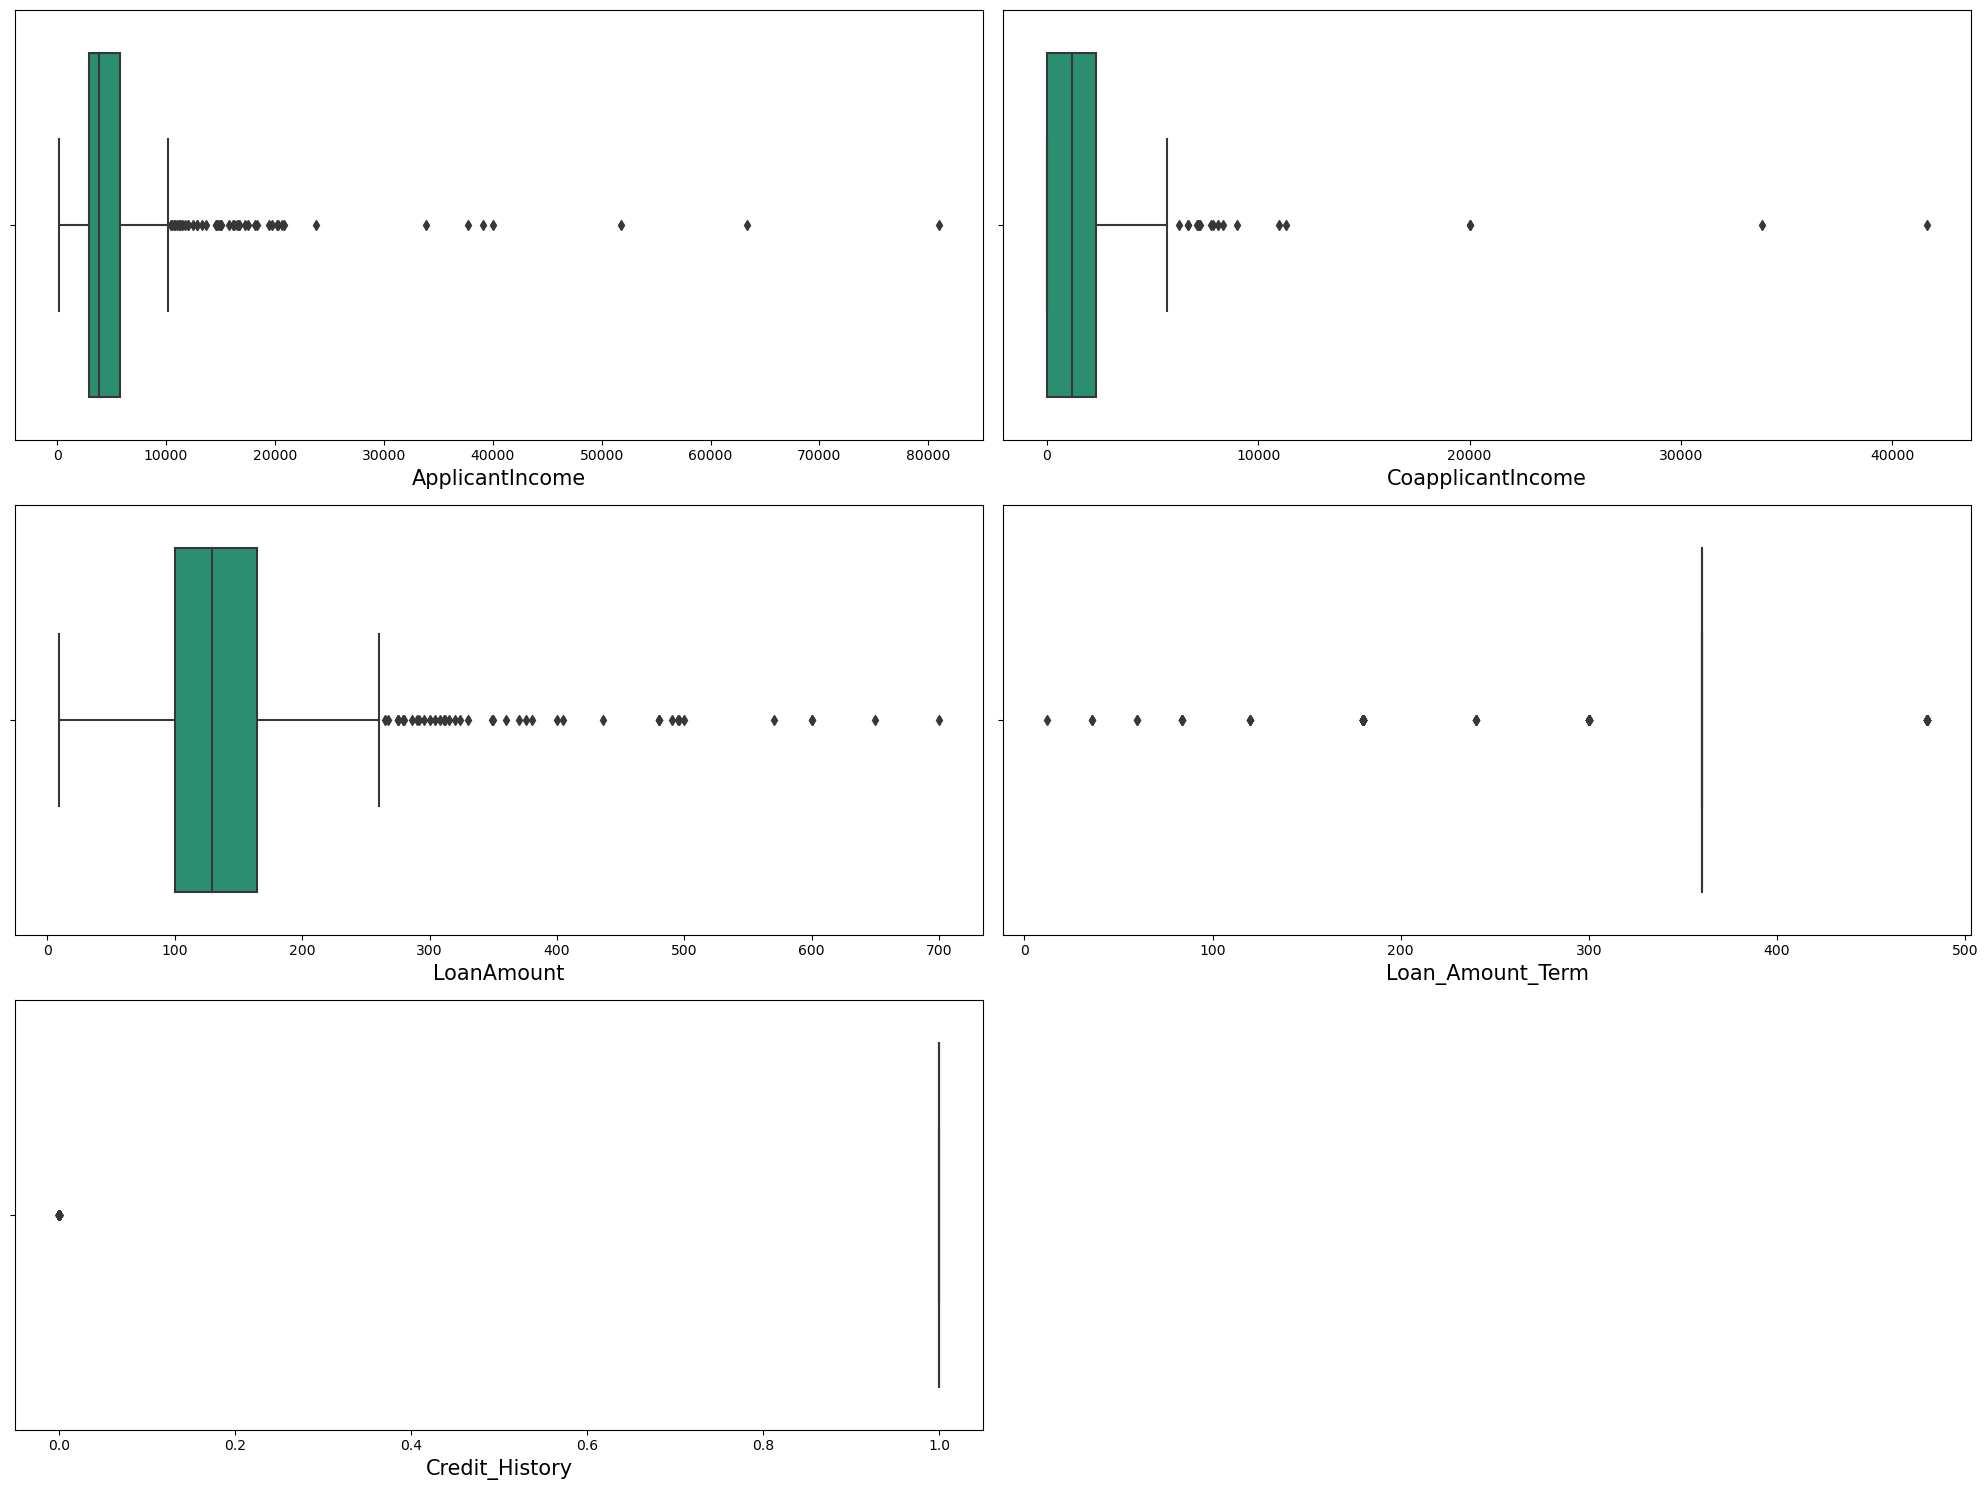

In [146]:
# lets check the oytliers by suing box plot

plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    

Here we have outliers in all columns

In [143]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


In [148]:
from scipy.stats import zscore
out_features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(out_features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.000000,0.280037
1,0.134412,0.038732,0.219273,0.280037
2,0.393747,0.554487,0.957641,0.280037
3,0.462062,0.251980,0.314547,0.280037
4,0.097728,0.554487,0.064454,0.280037
...,...,...,...,...
609,0.410130,0.554487,0.898095,0.280037
610,0.212557,0.554487,1.267279,2.463727
611,0.437174,0.472404,1.269371,0.280037
612,0.357064,0.554487,0.483367,0.280037


In [149]:
# threshold = 3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [150]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(577, 12)

In [151]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (614, 12)
New Dataframe (577, 12)


In [152]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 6.026058631921824


Here we have treated the outliers and the dataloss percentage is  percent

In [153]:
df=df1

In [154]:
df.shape

(577, 12)

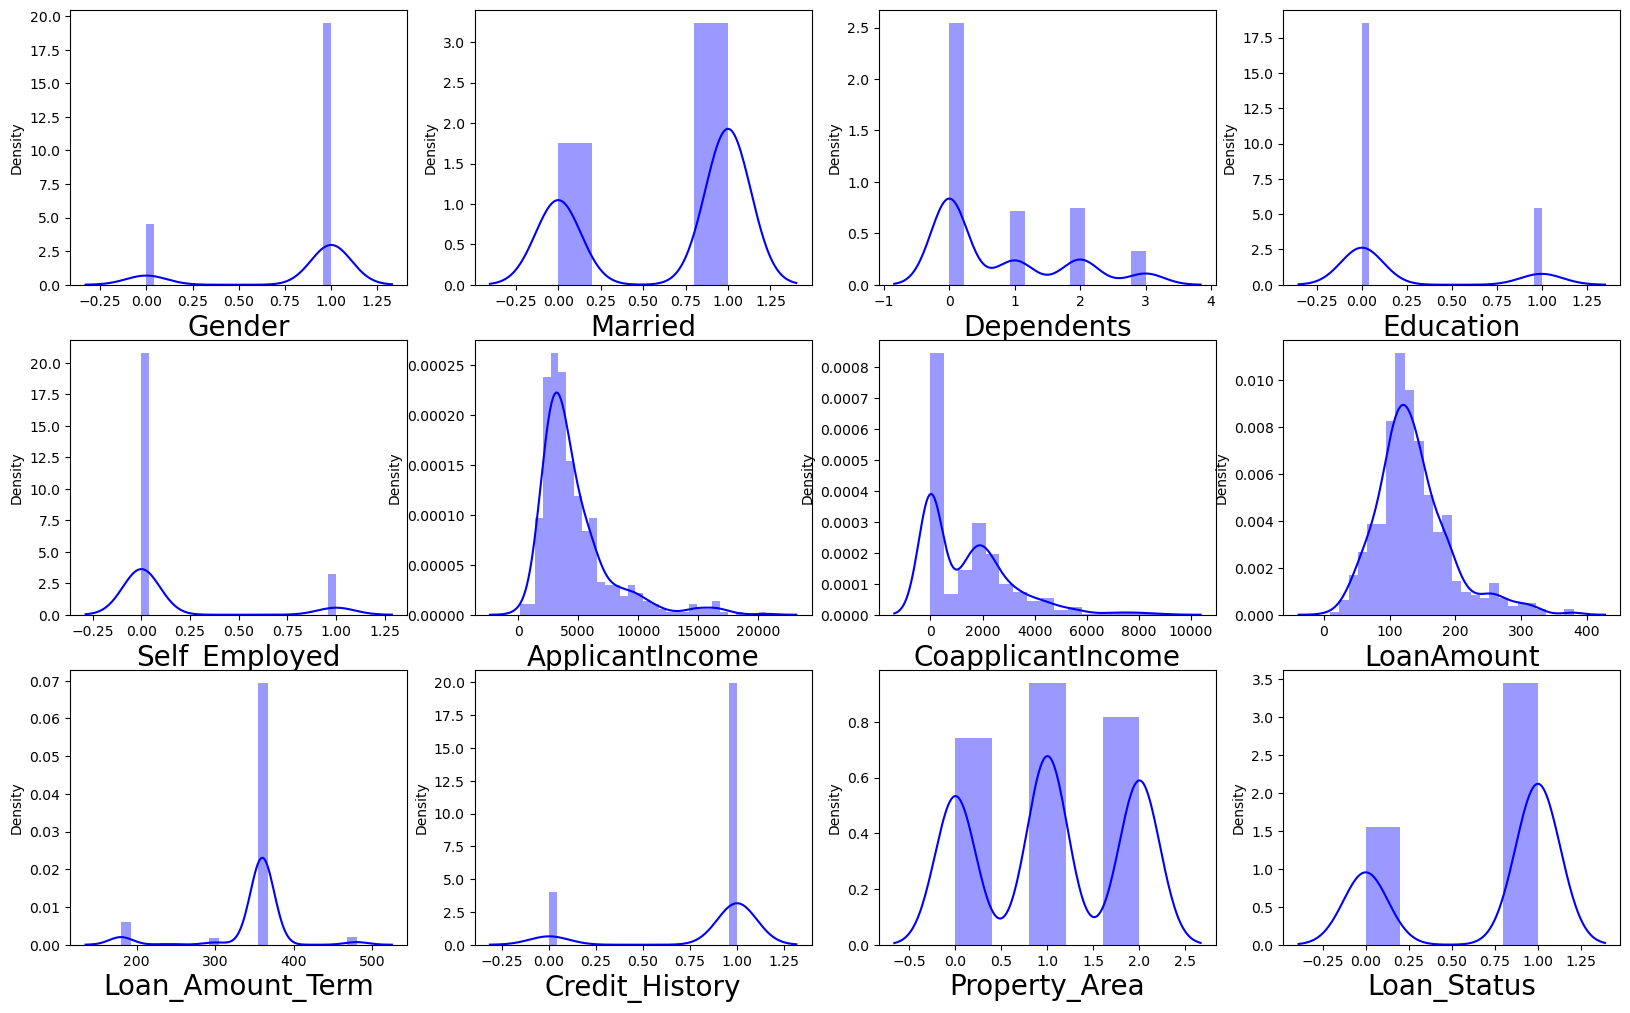

In [155]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=18:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

In [156]:
df.skew()

Gender              -1.608201
Married             -0.622219
Dependents           1.009090
Education            1.306588
Self_Employed        2.161431
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -1.995008
Credit_History      -1.779605
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Here most the columns are categorical so we did not treat its skewness of categorical columns but ApplicantIncome,CoapplicantIncome,LoanAmount is continous in natureso we have to treat its skewness

In [157]:
# removing skewness

df["ApplicantIncome"]=np.cbrt(df["ApplicantIncome"])
df["CoapplicantIncome"]=np.cbrt(df["CoapplicantIncome"])
df["LoanAmount"]=np.cbrt(df["LoanAmount"])

In [158]:
df.skew()

Gender              -1.608201
Married             -0.622219
Dependents           1.009090
Education            1.306588
Self_Employed        2.161431
ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -1.995008
Credit_History      -1.779605
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

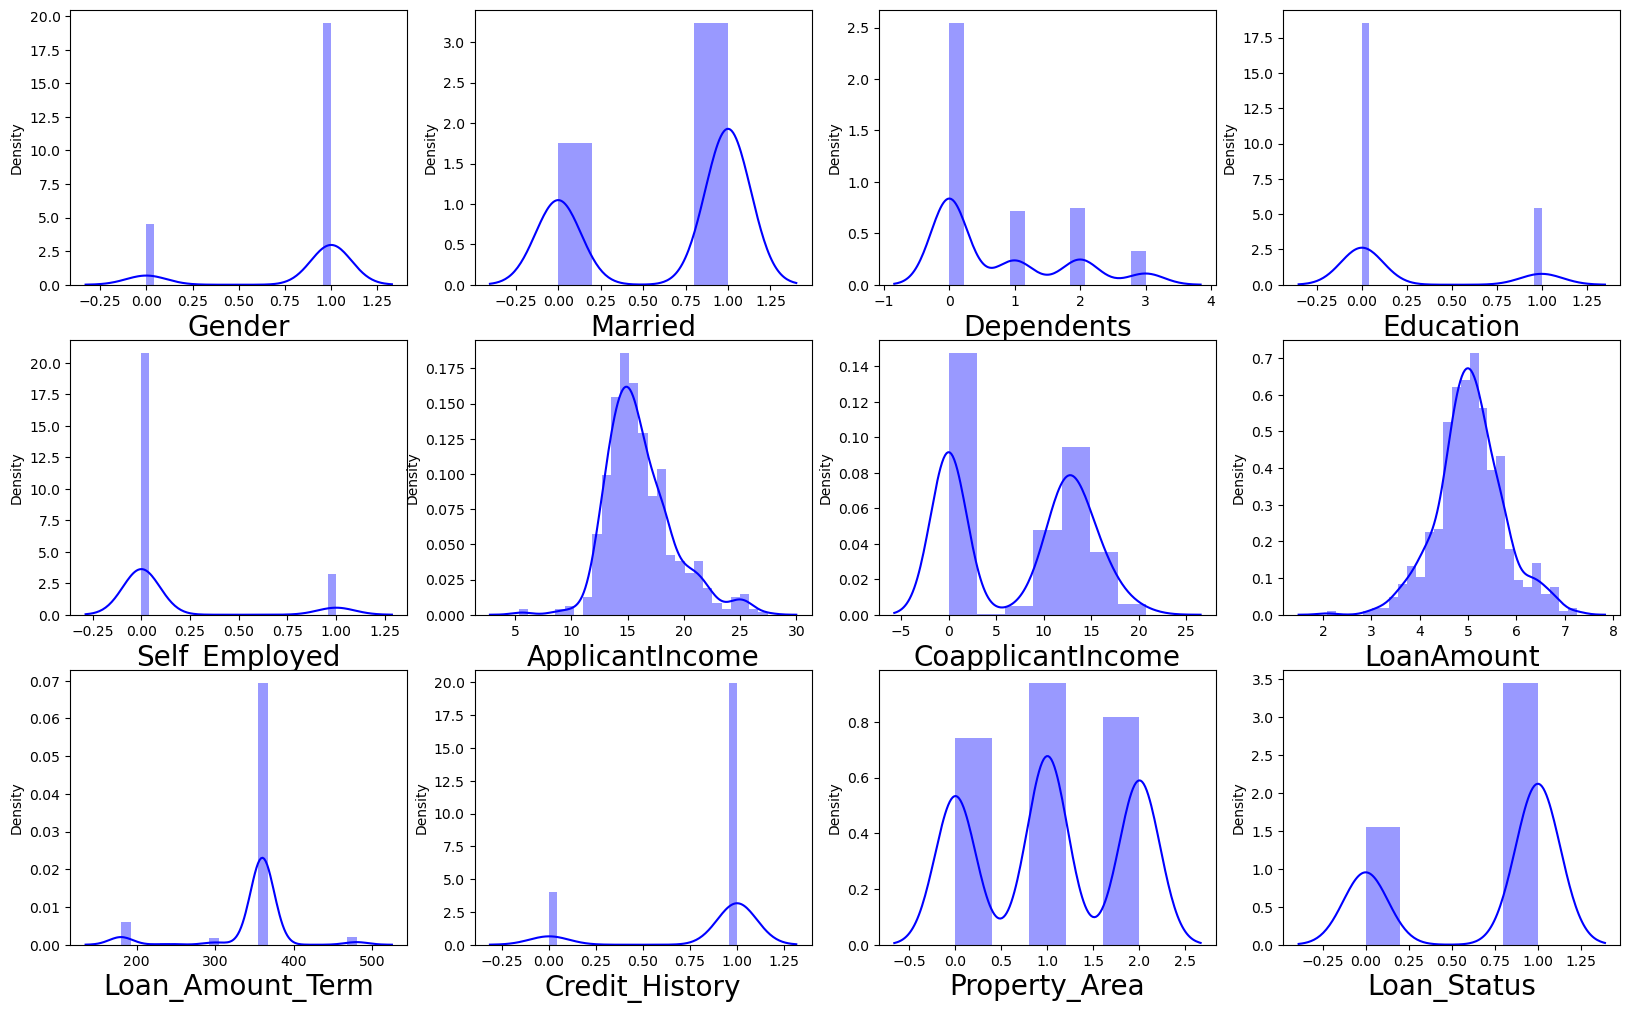

In [159]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=18:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

Now the columns look distributed normally

In [160]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.812825,0.648180,0.736568,0.227036,0.133449,16.134910,7.419133,5.048632,347.209705,0.831889,1.031196,0.689775
std,0.390390,0.477952,0.998226,0.419280,0.340354,3.025241,6.790619,0.697692,53.547870,0.374289,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.313293,0.000000,2.080084,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,14.149753,0.000000,4.641589,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,15.536163,10.786517,5.039684,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,17.685909,13.109528,5.428835,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,27.442635,20.785419,7.243156,480.000000,1.000000,2.000000,1.000000


By using describe method below is the observations

There is no null values 

Dataset looks good

The median value is greater than mean in CoapplicantIncome means data is skewed to left

the mean value is greater than median in ApplicantIncome and LoanAmount menas data is skewed to right

and also observed the std, min,25%,75% and max of the dataset

In [161]:
cor=df.corr()  #checking correlation

In [162]:
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.390822,0.189558,0.047941,0.005389,0.048385,0.234747,0.175965,-0.109737,-0.001853,-0.026070,0.014366
Married,0.390822,1.000000,0.329401,0.026756,-0.020383,-0.024905,0.324231,0.180905,-0.123217,0.008477,0.010727,0.086492
Dependents,0.189558,0.329401,1.000000,0.068482,0.032112,0.100656,-0.012147,0.129358,-0.065093,-0.058329,0.008238,0.003177
Education,0.047941,0.026756,0.068482,1.000000,-0.005862,-0.178728,0.030281,-0.125819,-0.097778,-0.088253,-0.068596,-0.092658
Self_Employed,0.005389,-0.020383,0.032112,-0.005862,1.000000,0.229183,-0.082951,0.119027,-0.037641,-0.014384,-0.034882,-0.012258
ApplicantIncome,0.048385,-0.024905,0.100656,-0.178728,0.229183,1.000000,-0.343626,0.441357,-0.060733,0.036881,-0.012177,-0.004722
CoapplicantIncome,0.234747,0.324231,-0.012147,0.030281,-0.082951,-0.343626,1.000000,0.228319,-0.033784,-0.015850,-0.081866,0.071908
LoanAmount,0.175965,0.180905,0.129358,-0.125819,0.119027,0.441357,0.228319,1.000000,0.049560,0.000062,-0.094665,-0.028730
Loan_Amount_Term,-0.109737,-0.123217,-0.065093,-0.097778,-0.037641,-0.060733,-0.033784,0.049560,1.000000,0.006873,-0.044727,-0.034276
Credit_History,-0.001853,0.008477,-0.058329,-0.088253,-0.014384,0.036881,-0.015850,0.000062,0.006873,1.000000,0.017768,0.550095


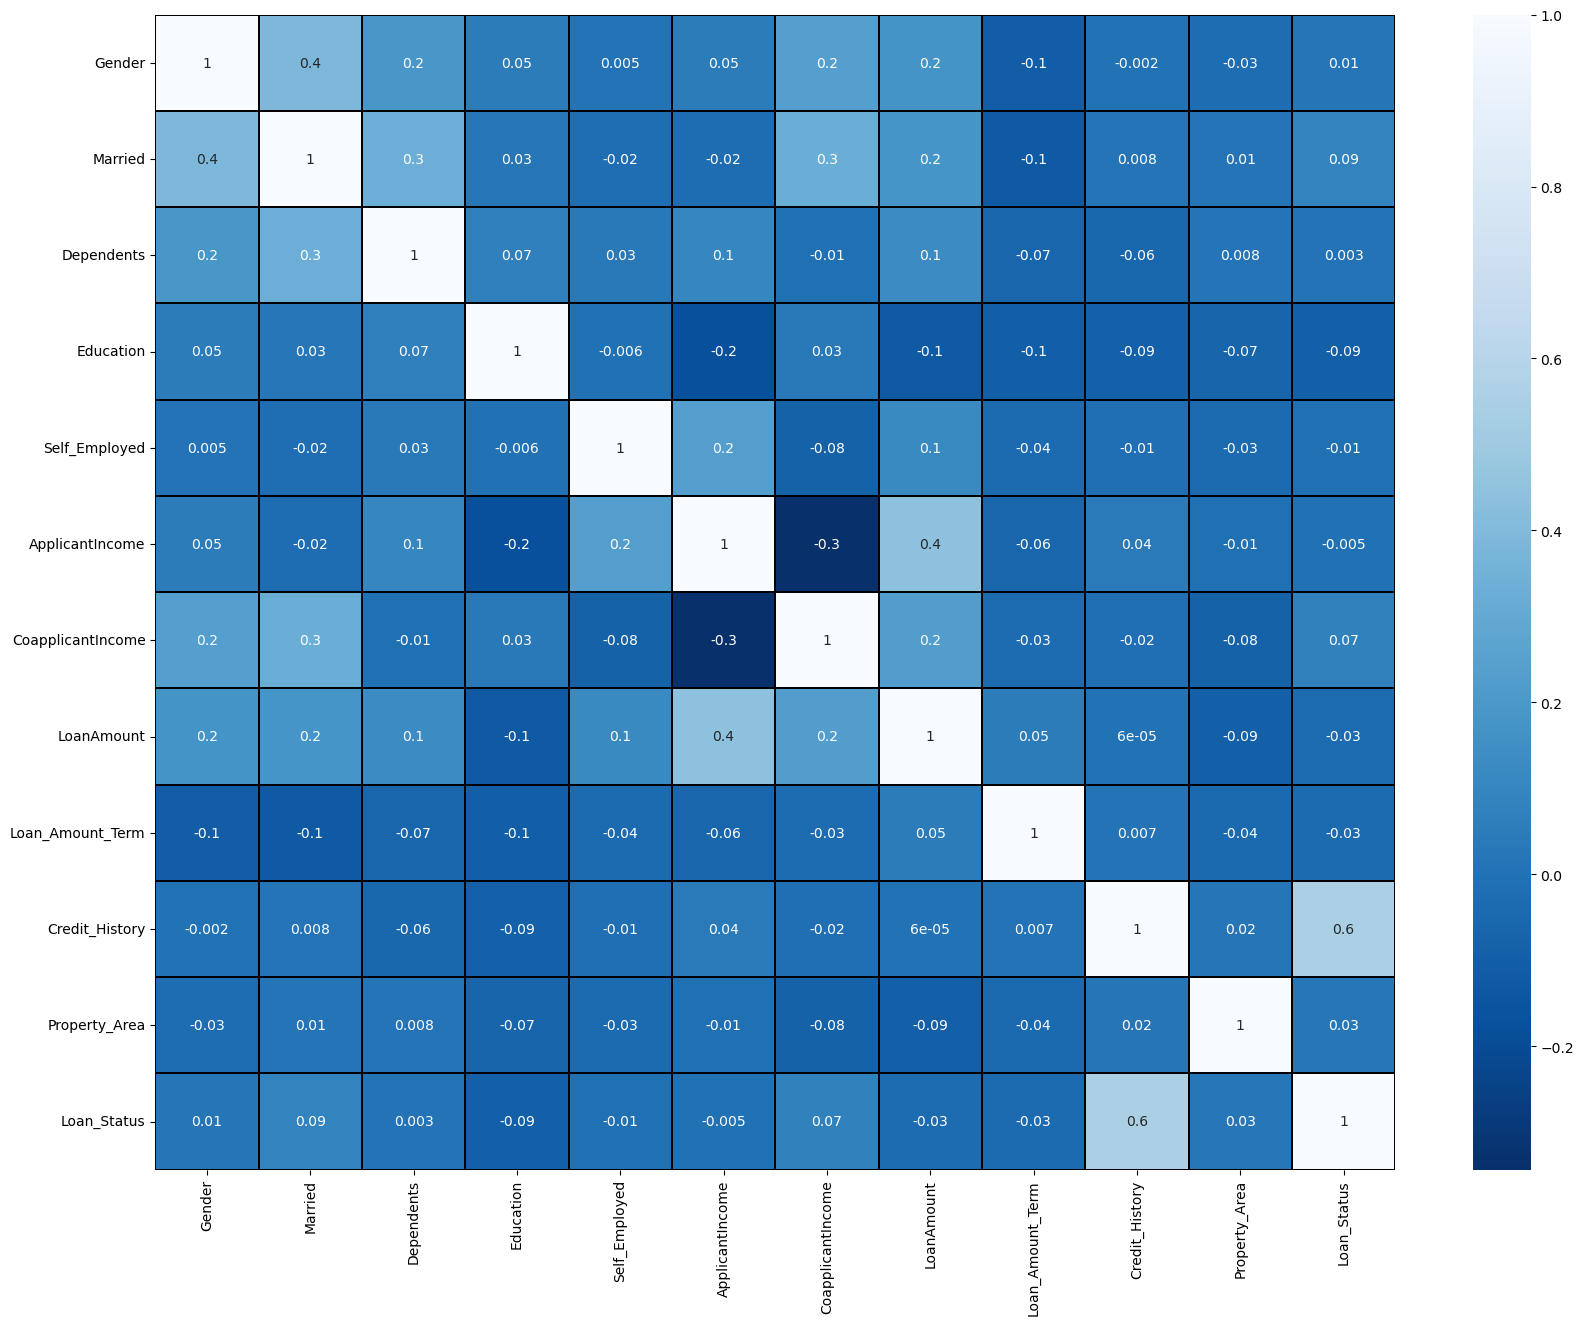

In [163]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

In [164]:
cor["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.550095
Married              0.086492
CoapplicantIncome    0.071908
Property_Area        0.026507
Gender               0.014366
Dependents           0.003177
ApplicantIncome     -0.004722
Self_Employed       -0.012258
LoanAmount          -0.028730
Loan_Amount_Term    -0.034276
Education           -0.092658
Name: Loan_Status, dtype: float64

here we found positive relationship only in Credit_History towards the target variable

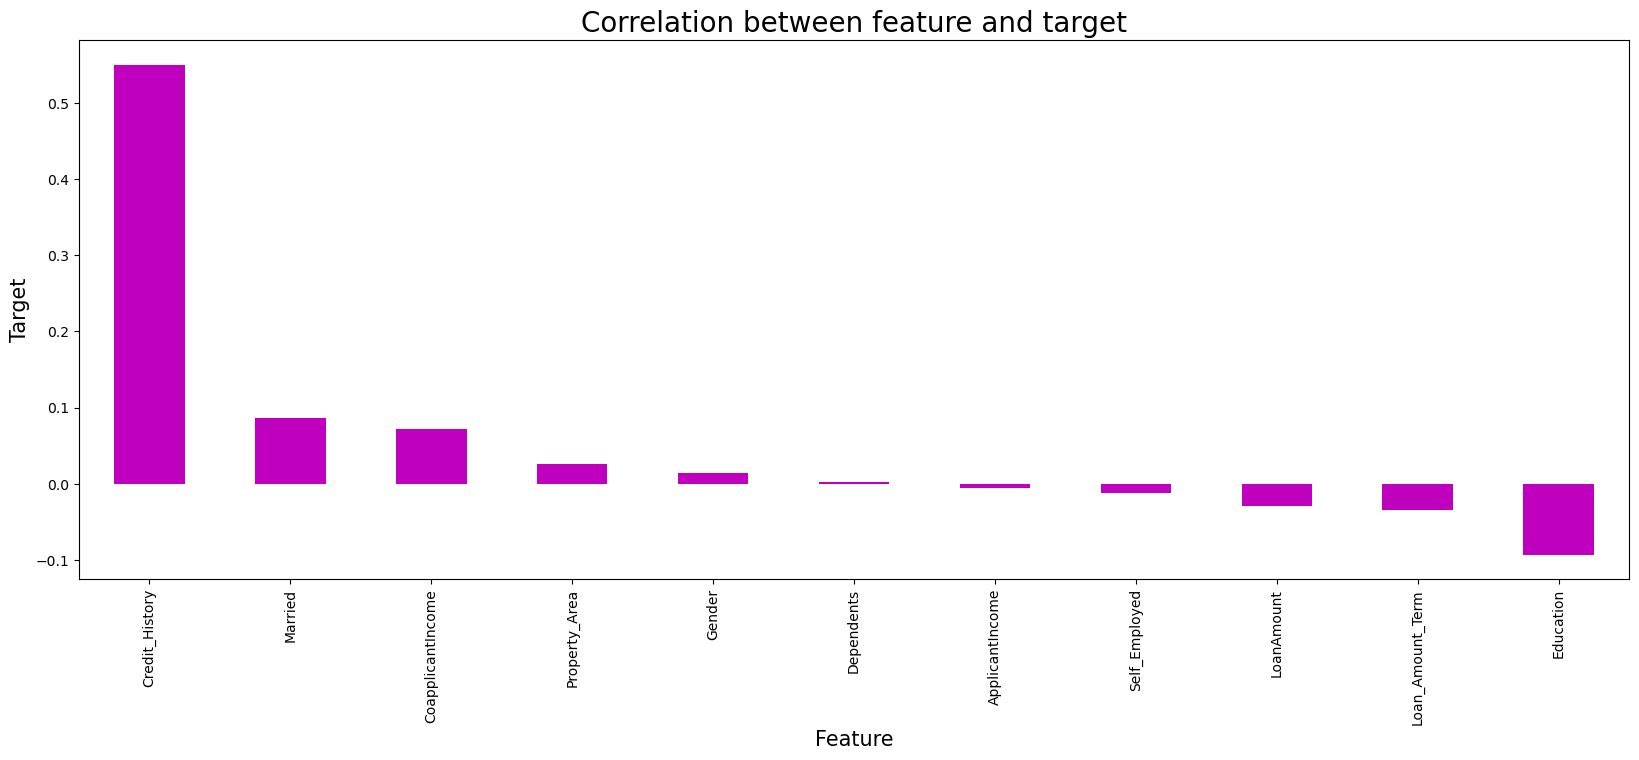

In [165]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

By observing the bar chart only credit history having positive correlation with the target variable

In [166]:
#seperating features and target
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [167]:
x.shape

(577, 11)

In [168]:
y.shape

(577,)

In [169]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.479872,-1.357337,-0.738518,-0.541961,-0.392428,0.622825,-1.093504,0.318405,0.239064,0.449537,1.227472
1,0.479872,0.736737,0.264129,-0.541961,-0.392428,0.157351,0.596681,-0.012836,0.239064,0.449537,-1.306522
2,0.479872,0.736737,-0.738518,-0.541961,2.548236,-0.566533,-1.093504,-1.445145,0.239064,0.449537,1.227472
3,0.479872,0.736737,-0.738518,1.845150,-0.392428,-0.798730,0.868268,-0.166705,0.239064,0.449537,1.227472
4,0.479872,-1.357337,-0.738518,-0.541961,-0.392428,0.673686,-1.093504,0.224069,0.239064,0.449537,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.083889,-1.357337,-0.738518,-0.541961,-0.392428,-0.620151,-1.093504,-1.302297,0.239064,0.449537,-1.306522
573,0.479872,0.736737,2.269421,-0.541961,-0.392428,-0.040329,-1.093504,-2.336409,-3.125330,0.449537,-1.306522
574,0.479872,0.736737,0.264129,-0.541961,-0.392428,1.298514,-0.177556,1.830577,0.239064,0.449537,1.227472
575,0.479872,0.736737,1.266775,-0.541961,-0.392428,1.161699,-1.093504,0.960923,0.239064,0.449537,1.227472


In [170]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.232613,Gender
1,1.416857,Married
2,1.174267,Dependents
3,1.074054,Education
4,1.060146,Self_Employed
5,1.800474,ApplicantIncome
6,1.607517,CoapplicantIncome
7,1.620051,LoanAmount
8,1.057740,Loan_Amount_Term
9,1.013558,Credit_History


Here we dont have any multicolinearity issue found 

In [171]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

In [172]:
#oversampling the data

!pip install imblearn
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x1,y1=sm.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [173]:
y1.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

In [174]:
#finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxACCU=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=1
print("best accuracy is:", maxACCU,  "at random state:",maxRS) 

best accuracy is: 0.8786610878661087 at random state: 1


In [175]:
# creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

Classifiaction Algorithms

In [176]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [177]:
#checking accuracy score for randomforestclassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7873563218390804
[[ 21  28]
 [  9 116]]
              precision    recall  f1-score   support

         0.0       0.70      0.43      0.53        49
         1.0       0.81      0.93      0.86       125

    accuracy                           0.79       174
   macro avg       0.75      0.68      0.70       174
weighted avg       0.78      0.79      0.77       174



In [178]:
#checking accuracy score for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8045977011494253
[[ 18  31]
 [  3 122]]
              precision    recall  f1-score   support

         0.0       0.86      0.37      0.51        49
         1.0       0.80      0.98      0.88       125

    accuracy                           0.80       174
   macro avg       0.83      0.67      0.70       174
weighted avg       0.81      0.80      0.78       174



In [179]:
#checking accuracy score for support vector machine

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8045977011494253
[[ 18  31]
 [  3 122]]
              precision    recall  f1-score   support

         0.0       0.86      0.37      0.51        49
         1.0       0.80      0.98      0.88       125

    accuracy                           0.80       174
   macro avg       0.83      0.67      0.70       174
weighted avg       0.81      0.80      0.78       174



In [180]:
#checking accuracy score for GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7816091954022989
[[ 22  27]
 [ 11 114]]
              precision    recall  f1-score   support

         0.0       0.67      0.45      0.54        49
         1.0       0.81      0.91      0.86       125

    accuracy                           0.78       174
   macro avg       0.74      0.68      0.70       174
weighted avg       0.77      0.78      0.77       174



In [181]:
#checking accuracy score for AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(x_train,y_train)
predAB=AB.predict(x_test)
print(accuracy_score(y_test,predAB))
print(confusion_matrix(y_test,predAB))
print(classification_report(y_test,predAB))

0.7816091954022989
[[ 20  29]
 [  9 116]]
              precision    recall  f1-score   support

         0.0       0.69      0.41      0.51        49
         1.0       0.80      0.93      0.86       125

    accuracy                           0.78       174
   macro avg       0.74      0.67      0.69       174
weighted avg       0.77      0.78      0.76       174



In [182]:
#checking accuracy score for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7528735632183908
[[ 23  26]
 [ 17 108]]
              precision    recall  f1-score   support

         0.0       0.57      0.47      0.52        49
         1.0       0.81      0.86      0.83       125

    accuracy                           0.75       174
   macro avg       0.69      0.67      0.68       174
weighted avg       0.74      0.75      0.74       174



Checking cross validation score

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
# checking cv score for RandomForestClassifier

score1 = cross_val_score(RFC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predRFC) - score1.mean())*100)

[0.76875    0.76100629 0.87421384 0.86792453 0.90566038]
0.8355110062893083
Difference between accuracy score and cross val score is - -4.815468445022786


In [185]:
# checking cv score for Logistic Regression

score2 = cross_val_score(LR,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predLR) - score2.mean())*100)

[0.71875    0.72327044 0.77358491 0.71698113 0.72955975]
0.7324292452830188
Difference between accuracy score and cross val score is - 7.216845586640652


In [186]:
# checking cv score for GradientBoostingClassifier

score3 = cross_val_score(GB,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predGB) - score3.mean())*100)

[0.71875    0.72955975 0.86163522 0.80503145 0.87421384]
0.7978380503144654
Difference between accuracy score and cross val score is - -1.6228854912166524


In [187]:
# checking cv score for support vector machine classifier

score4 = cross_val_score(svc,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predsvc) - score4.mean())*100)

[0.7625     0.73584906 0.7672956  0.75471698 0.79874214]
0.7638207547169811
Difference between accuracy score and cross val score is - 4.077694643244422


In [188]:
# checking cv score for AdaBoost classifier

score5 = cross_val_score(AB,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predAB) - score5.mean())*100)

[0.68125    0.72327044 0.81761006 0.79245283 0.8490566 ]
0.7727279874213837
Difference between accuracy score and cross val score is - 0.8881207980915184


In [189]:
# checking cv score for Extratreesclassifier

score6 = cross_val_score(ET,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predET) - score6.mean())*100)

[0.775      0.77358491 0.86163522 0.88050314 0.88679245]
0.8355031446540881
Difference between accuracy score and cross val score is - -8.262958143569731


Here AdaBoostClassifier is our best fot model as difference between CV score and accuracy score is least

Hyperparameter Tuning

In [194]:
# Adaboostclassifier

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

GCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]})

In [195]:
GCV.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

In [196]:
final_model=AdaBoostClassifier(learning_rate=0.01,n_estimators=10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.45977011494253


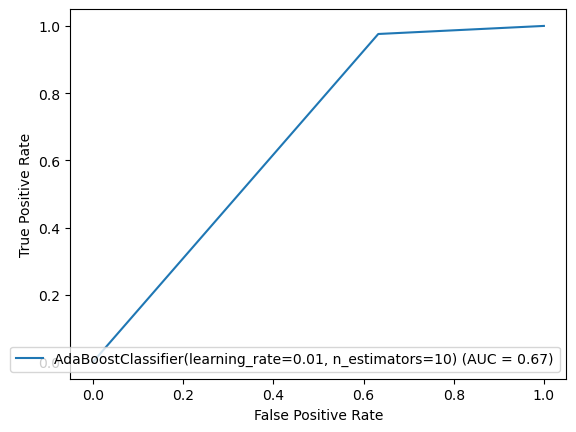

In [197]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

Saving the model

In [198]:
# saving model using .pkl

import joblib
joblib.dump(final_model,'Loan Application Status Project.pkl')

['Loan Application Status Project.pkl']

In [199]:
#lets load the saved model and get the predictions

model=joblib.load('Loan Application Status Project.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0.])

In [200]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
169,1.0,1.0
170,1.0,1.0
171,1.0,1.0
172,0.0,0.0
